<a href="https://colab.research.google.com/github/thanmai09/breast-cancer-wisconsin/blob/main/breast_cancer_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("/content/breast-cancer-wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.loc[df['diagnosis']=='M', 'benign_0__mal_1'] = 1
df.loc[df['diagnosis']=='B', 'benign_0__mal_1'] = 0

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,benign_0__mal_1
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1.0


In [8]:
df = df.drop(columns = ['id','Unnamed: 32','diagnosis'])

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

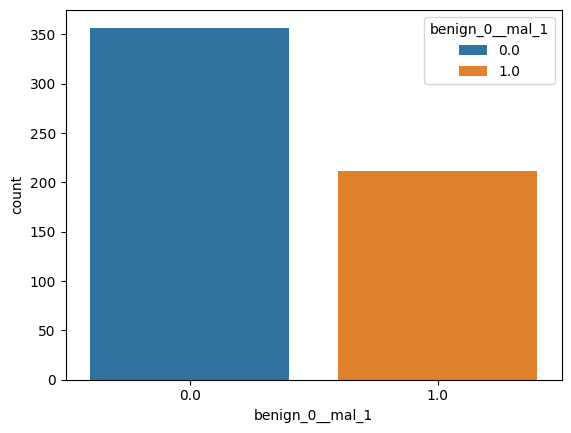

In [9]:
sns.countplot(x='benign_0__mal_1', data=df,hue="benign_0__mal_1")

In [10]:
df['benign_0__mal_1'].value_counts()

,count
benign_0__mal_1,
0.0,357
1.0,212


<Axes: >

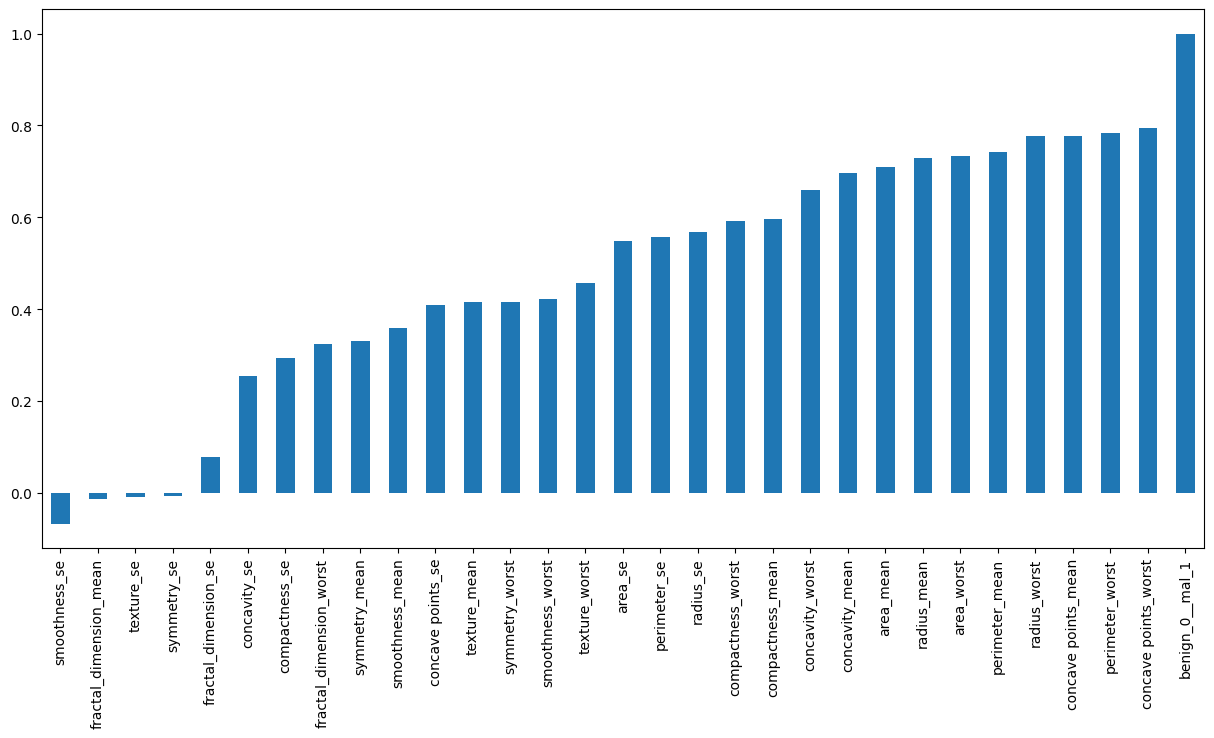

In [11]:
plt.figure(figsize=(15,7))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [12]:
#Independent and Dependent Variables

X = df.drop(['benign_0__mal_1'], axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [15]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.341663,0.365911,0.335982,0.201442,0.331137,0.280412,0.118627,0.151988,0.225253,0.213353,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401
1,0.246533,0.121069,0.243867,0.132471,0.487226,0.232225,0.066893,0.143241,0.414141,0.310657,...,0.192458,0.154318,0.204044,0.088478,0.472363,0.224321,0.079193,0.281340,0.375320,0.245113
2,0.294335,0.261075,0.278764,0.168865,0.176221,0.079320,0.101593,0.054920,0.215657,0.134583,...,0.213803,0.421109,0.188605,0.102438,0.257082,0.119830,0.183546,0.170790,0.236941,0.111111
3,0.385205,0.235712,0.380001,0.243097,0.326171,0.234648,0.176898,0.202734,0.269697,0.208509,...,0.350053,0.219083,0.335126,0.197675,0.514627,0.296698,0.265735,0.430241,0.364676,0.277843
4,0.364381,0.352384,0.352083,0.229480,0.415636,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.155048,0.232748,0.552921,0.288587,0.177883


Model building using sklearn

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        72
         1.0       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [21]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[72  0]
 [ 3 39]]


Model building using Tenserflow

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Dropout

In [23]:
# Creating the model
model1 = Sequential()
model1.add(InputLayer(input_shape=(30,)))  # Input layer with 30 input features
model1.add(Dense(26, activation='relu'))  # First hidden layer
model1.add(Dense(15, activation='relu'))  # Second hidden layer
model1.add(Dense(1, activation='sigmoid'))  # Output layer
model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 26)             │           806 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,227 (4.79 KB)

 Trainable params: 1,227 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model1.fit(X_train,y_train, epochs=100 ,validation_data=(X_test,y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6087 - loss: 0.6797 - val_accuracy: 0.7193 - val_loss: 0.6601
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7324 - loss: 0.6458 - val_accuracy: 0.7982 - val_loss: 0.6249
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8154 - loss: 0.6075 - val_accuracy: 0.8246 - val_loss: 0.5781
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8361 - loss: 0.5603 - val_accuracy: 0.8684 - val_loss: 0.5278
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8523 - loss: 0.5098 - val_accuracy: 0.8772 - val_loss: 0.4755
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8877 - loss: 0.4543 - val_accuracy: 0.9211 - val_loss: 0.4182
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9027 - loss: 0.4109 - val_accuracy: 0.9386 - val_loss: 0.3667
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9148 - loss: 0.3588 - val_accuracy: 0.9386 - 

In [25]:
import matplotlib.pyplot as plt



In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)
model1.fit(x=X_train, y=y_train,epochs=100, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9894 - loss: 0.0443 - val_accuracy: 0.9737 - val_loss: 0.1025
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9760 - loss: 0.0569 - val_accuracy: 0.9737 - val_loss: 0.1006
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9879 - loss: 0.0454 - val_accuracy: 0.9737 - val_loss: 0.1016
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9851 - loss: 0.0574 - val_accuracy: 0.9737 - val_loss: 0.1027
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9800 - loss: 0.0592 - val_accuracy: 0.9737 - val_loss: 0.1015
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9915 - loss: 0.0325 - val_accuracy: 0.9737 - val_loss: 0.1076
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9801 - loss: 0.0476 - val_accuracy: 0.9737 - val_loss: 0.1039
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9852 - loss: 0.0444 - val_accuracy: 0.9737 - 

<Axes: >

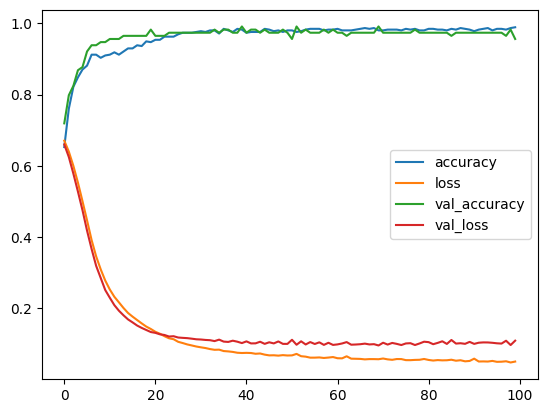

In [27]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [28]:
# Adding Dropout Layers

from tensorflow.keras.layers import Dropout

In [29]:
model = Sequential()
model.add(InputLayer(input_shape=(30,)))  # Explicitly adding input layer with 26 input features
model.add(Dense(26,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [30]:
model.fit(x=X_train,y=y_train,epochs=150, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5468 - loss: 0.6948 - val_accuracy: 0.5702 - val_loss: 0.6858
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6073 - loss: 0.6771 - val_accuracy: 0.7368 - val_loss: 0.6672
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6350 - loss: 0.6705 - val_accuracy: 0.8158 - val_loss: 0.6456
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6999 - loss: 0.6535 - val_accuracy: 0.8246 - val_loss: 0.6243
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.6286 - val_accuracy: 0.8070 - val_loss: 0.6004
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7450 - loss: 0.6145 - val_accuracy: 0.8509 - val_loss: 0.5766
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7819 - loss: 0.5830 - val_accuracy: 0.8684 - val_loss: 0.5489
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7749 - loss: 0.5706 - val_accuracy: 0.8947 

<Axes: >

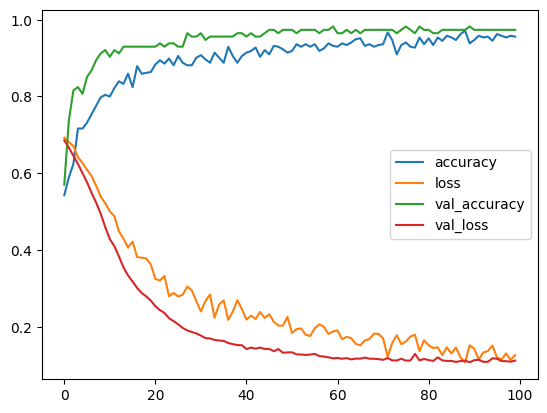

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [32]:
score = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9738 - loss: 0.0888


In [33]:
print(model.metrics_names)
print(score)

['loss', 'compile_metrics']
[0.11202751845121384, 0.9736841917037964]


In [34]:
from keras.models import load_model
model.save('1234ES_Drop_model.h5')

In [35]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

Using model for future predictions

In [36]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load the model
model = tf.keras.models.load_model('1234ES_Drop_model.h5')

# load scalar parameters
# Load fitted scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)


# Example input data (replace with your own data)
# Ensure you include all 30 features expected by the model
input_data = {
    'radius_mean': [14.0],
    'texture_mean': [20.0],
    'perimeter_mean': [90.0],
    'area_mean': [600.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.15],
    'concavity_mean': [0.2],
    'concave_points_mean': [0.1],
    'symmetry_mean': [0.2],
    'fractal_dimension_mean': [0.06],
    'radius_se': [0.2],
    'texture_se': [1.0],
    'perimeter_se': [1.5],
    'area_se': [20.0],
    'smoothness_se': [0.005],
    'compactness_se': [0.02],
    'concavity_se': [0.03],
    'concave_points_se': [0.01],
    'symmetry_se': [0.03],
    'fractal_dimension_se': [0.004],
    'radius_worst': [16.0],
    'texture_worst': [25.0],
    'perimeter_worst': [105.0],
    'area_worst': [800.0],
    'smoothness_worst': [0.12],
    'compactness_worst': [0.2],
    'concavity_worst': [0.3],
    'concave_points_worst': [0.15],
    'symmetry_worst': [0.25],
    'fractal_dimension_worst': [0.08]
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Preprocess the input data (normalize, scale, etc.)
input_array = scaler.transform(input_df)  # Directly use the transformed array

# Make predictions
predictions = model.predict(input_array)

# For binary classification, convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype("int32")  # Assuming a threshold of 0.5

# # Example mapping for binary classification
class_mapping = {0: 'Benign', 1: 'Malignant'}

# List comprehension to map predicted class labels to their corresponding names
predicted_class_names = []
for label in predicted_classes:
    predicted_class_names.append(class_mapping[label[0]])


print(predicted_class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
['Malignant']
